# Matrix Formalism of the  Equations of Movement

Renato Naville Watanabe

In this notebook will be shown two examples of how to use a matrix formalism to perform forward dynamics. It does not consist a comprehensive treatise about the subject. It is rather an introduction based on examples. Nevertheless, the reader of this notebook will have sufficient knowledge to read recent texts on biomechanics and other multibody dynamic analysis.
 

## Forward Dynamics

For the forward dynamics analysis, we will consider that we know the torques and find the angular accelerations. Naturally, we could begin our analysis from the muscle forces, from the muscle activations or even from the neural commands from the motor cortex. 

<figure><img src="../images/foward.png" width=600/> <figcaption><i><center>Adapted from Erdemir et al. (2007) </center></i></figcaption>
        

As an introduction to the matrix formalism used in multibody analysis, we will consider the double-pendulum system. This system could be used as a  model from the arm and forearm of a subject, for example, and is an example of chaotic system.

In the notebook about [free-body diagram](FreeBodyDiagramForRigidBodies.ipynb#doublependulum), we found the following equations of motion to the double-pendulum with actuators.  

\begin{align}
\begin{split}
     \left(\frac{m_1l_1^2}{3} +m_2l_1^2\right)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_1l_2}{2} \cos{(\theta_1-\theta_2)\frac{d^2\theta_2}{dt^2}}  &=  -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)   - \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)  + M_1 - M_{12} \\
    \frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_2^2}{3}\frac{d^2\theta_2}{dt^2} &= -\frac{m_2gl_2}{2}\sin(\theta_2) + \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)+ M_{12} 
    \end{split}
\end{align}

If we wanted to simulate this double pendulum we still need to isolate the angular accelerations of each of the bars. As can be easily noted, this would be too laborious to do by hand. Luckily, numerical integration is performed by computers. The easiest way to isolate these angular accelerations is to note that we can write the angular accelerations and the numbers multiplying them as a matrix and a vector. 

\begin{equation}
     \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]\cdot\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) + M_1 - M_{12}\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_2gl_2}{2}\sin(\theta_2) + M_{12} \end{array}\right] 
\end{equation}

   Typically the equations of motion are divided into a matrix corresponding to the terms involving the angular velocities (centrifugal and Coriolis forces), a  matrix corresponding to gravitational force and another matrix corresponding to the forces and torques being applied to the system.

\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}

where 

- $q$ is the vector of the generalized coordinates, like angles and positions;
- $M(q)$ is the matrix containing the inertia elements like mass and moments of inertia;
- $C(q,\dot{q})$  is the vector with the forces and moments dependent from the velocities and angular velocities, like centrifugal and Coriolis forces;
- $G(q)$ is the vector with the forces and torques caused by the gravitational force;
- $Q$ is the vector with forces and torques being applied to the body, like muscular torques and forces due to the constraints.
- $E$ is the vector with the forces and torques due to some external element, like springs or the Ground reaction Force.

We can divide the equation describing the behavior of the double-pendulum in the matrices above:

\begin{equation}
     \underbrace{\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]}_{M}\cdot\underbrace{\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right]}_{\ddot{q}} = \underbrace{\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right]}_{C} + \underbrace{\left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right]}_{G} + \underbrace{\left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]}_{Q} 
\end{equation}

To solve this differential equation numerically, we must obtain the expression of the angular accelerations. We can perform this by multiplying both sides by the inverse of the matrix $M$.

\begin{equation}
    \left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\cdot\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right] + \left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right] + \left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]\right)
\end{equation}

Generically, having the differential equations in the format:

\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}

we can obtain the equation to perform the forward dynamics by:


\begin{equation}
    \ddot{q} = M(q)^{-1}\left[C(q,\dot{q}) + G(q) + Q +  E\right]
\end{equation}



Now that we have the angular accelerations, to solve the equation numerically we must transform the second-order differential equations in first-order differential equations:

\begin{equation}
    \left[\begin{array}{c}\frac{d\omega_1}{dt}\\\frac{d\omega_2}{dt}\\\frac{d\theta_1}{dt}\\\frac{d\theta_2}{dt} \end{array}\right] =  \left[\begin{array}{c}\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\omega_2^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\omega_1^2 \sin(\theta_1-\theta_2)\end{array}\right]+\left[\begin{array}{c} -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) \\-\frac{m_2gl_2}{2}\sin(\theta_2)  \end{array}\right] + \left[ \begin{array}{c}M_1 - M_{12}\\M_{12}\end{array}\right]\right)\\ \omega_1\\ \omega_2\end{array}\right]
\end{equation}

Below is the numerical solution of a double-pendulum with each bar having length equal to 1 m and mass equal to 1 kg.

In [139]:
import numpy as np

g = 9.81
    
m1 = 1
m2 = 1
l1 = 1
l2 = 0.5

theta10 = np.pi/10
theta20 = np.pi/3
omega10 = 2*np.pi
omega20 = -6*np.pi

dt = 0.0001
t = np.arange(0, 20, dt)
state = np.zeros((4, len(t)))

state[:,0] = np.array([omega10, omega20, theta10, theta20])
#print(state[0,0])
M1 = 0
M12 = 0

for i in range(1,len(t)):
   
    thetaDiff = state[2,i-1] - state[3,i-1]
      
    M = np.array([[m1*l1**2/3 + m2*l1**2, m2*l1*l2*np.cos(thetaDiff)/2],
                  [m2*l1*l2*np.cos(thetaDiff)/2, m2*l2**2/3]])

    C = np.array([[-m2*l1*l2*np.sin(thetaDiff)*state[1,i-1]**2/2],
                  [m2*l1*l2*np.sin(thetaDiff)*state[0,i-1]**2/2]])

    G = np.array([[-m1*g*l1/2*np.sin(state[2,i-1]) - m2*g*l2*np.sin(state[2,i-1])],
                  [-m2*g*l2/2*np.sin(state[3,i-1])]])

    #PID control
    #r = np.pi/3
    #M12 = 30*(r-state[3,i-1])- 2*state[1,i-1] + 3*np.trapz(r-state[3,0:i])*dt
    Q = np.array([[M1 - M12],[M12]])
    
    
    
    dstatedt = np.vstack((np.linalg.inv(M)@(C+G+Q),state[0,[i-1]],state[1,[i-1]]))
    
    state[:,[i]] =  state[:,[i-1]] + dt*dstatedt



<IPython.core.display.Javascript object>


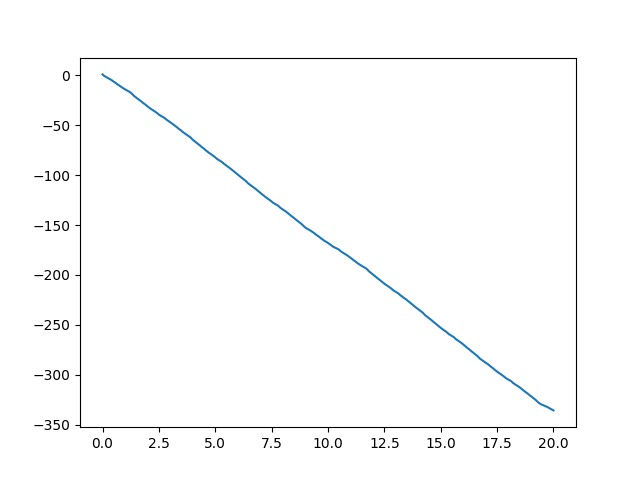

In [140]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(t[0::10], state[3,0::10].T)
#plt.plot(t[0::10], r*np.ones_like(t[0::10]))
plt.show()

<IPython.core.display.Javascript object>


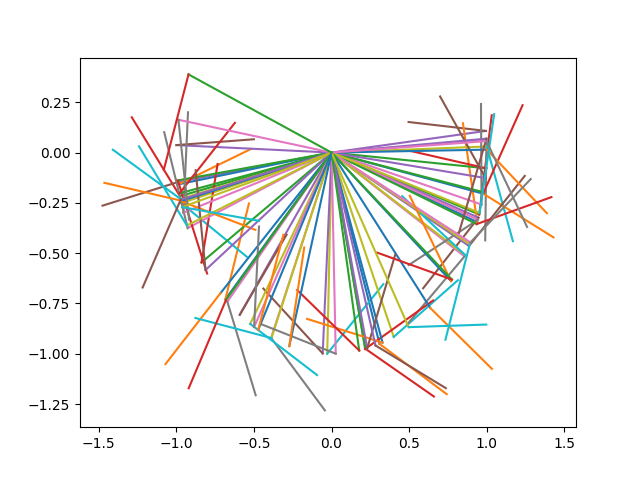

In [141]:
plt.figure()

step = 3000

for i in range(len(state[2,0::step])):
    
    plt.plot([0, l1*np.sin(state[2,i*step])], 
             [0, -l1*np.cos(state[2,i*step])])
    plt.plot([l1*np.sin(state[2,i*step]), l1*np.sin(state[2,i*step])+l2*np.sin(state[3,i*step])], 
             [-l1*np.cos(state[2,i*step]), -l1*np.cos(state[2,i*step])-l2*np.cos(state[3,i*step])])
plt.show()

## Problems

1) Solve the problems 18.3.20 and 18.3.24 of the Ruina and Rudra's book by using the Lagrangian formalism (it is much easier than use the Newton-Euler formalism) and then use the matrix formalism to obtain the expressions of the angular accelerations. 



## References 


- YAMAGUCHI, G. T. Dynamic modeling of musculoskeletal motion: a vectorized approach for biomechanical analysis in three dimensions., 2001

- CRAIG, J. Introduction to robotics. , 1989

- JAIN, A. Robot and multibody dynamics. , 2011

- SPONG, M. W.; HUTCHINSON, S.; VIDYASAGAR, M. Robot modeling and control., 2006

- ERDEMIR, A. et al. Model-based estimation of muscle forces exerted during movements. Clinical Biomechanics, v. 22, n. 2, p. 131–154, 2007. 

- STANEV, D.; MOUSTAKAS, K. Simulation of constrained musculoskeletal systems in task space. IEEE Transactions on Biomedical Engineering, v. 65, n. 2, p. 307–318, 2018.

- ZAJAC FE, GORDON ME , [Determining muscle's force and action in multi-articular movement](https://drive.google.com/open?id=0BxbW72zV7WmUcC1zSGpEOUxhWXM&authuser=0). Exercise and Sport Sciences Reviews, 17, 187-230. , 1989

- RUINA A, RUDRA P. [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press. , 2015